In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from matplotlib_venn import venn3

import networkx as nx
import pandas as pd

from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

In [3]:

# url = "http://materias.df.uba.ar/scytda2020c1/files/2020/04/TC01_data.zip"
# with urlopen(url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#        archivos = zfile.namelist()
#        for archivo in archivos:
#            if archivo.endswith('.txt') or archivo.endswith('.gml') or archivo.endswith('.csv'):
#                zfile.extract(archivo, '/content')

In [4]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

# Ejercicio 1

## Item a:
- Presentar comparacion grafica de las 3 redes

In [3]:
## Comparar si está entre los demas

#Chequear esto, existe una librería que hace esto: 
# https://networkx.org/documentation/stable/reference/functions.html

#PREGUNTAR ESTO!

# Si esto esta bien, agregar if para que grafique solo si es Di o no lo es.
# Dadas las hipotesis que tengo, todas las redes son no direccionadas. Lit porque no se que frase une cada par de proteina
# Y2H porque asumo que da lo mismo la reacción X-YZ que Y-XZ, donde Z es la proteina fluorescente.
# AP-MS no entendí bien porque pero es no dirigida.

# boolean = []
# for aa in lit:
#     # print(aa, aa[::-1])
#     boolean.append(aa == aa[::-1])

# plt.plot(boolean, 'o')

In [5]:
# armamos el grafo de nx a partir del archivo

y2h = abrir_txt('TC01_data/yeast_Y2H.txt')

Red_Y2H = nx.Graph()
Red_Y2H.add_edges_from(y2h) #lista_de_enlaces es la que obtuvimos aplicando la función abrir_txt a alguno de los .txt. 
# En networkx, no es necesario agregar primero los nodos y luego los enlaces. Podemos pasar los enlaces y agrega los nodos automáticamente.

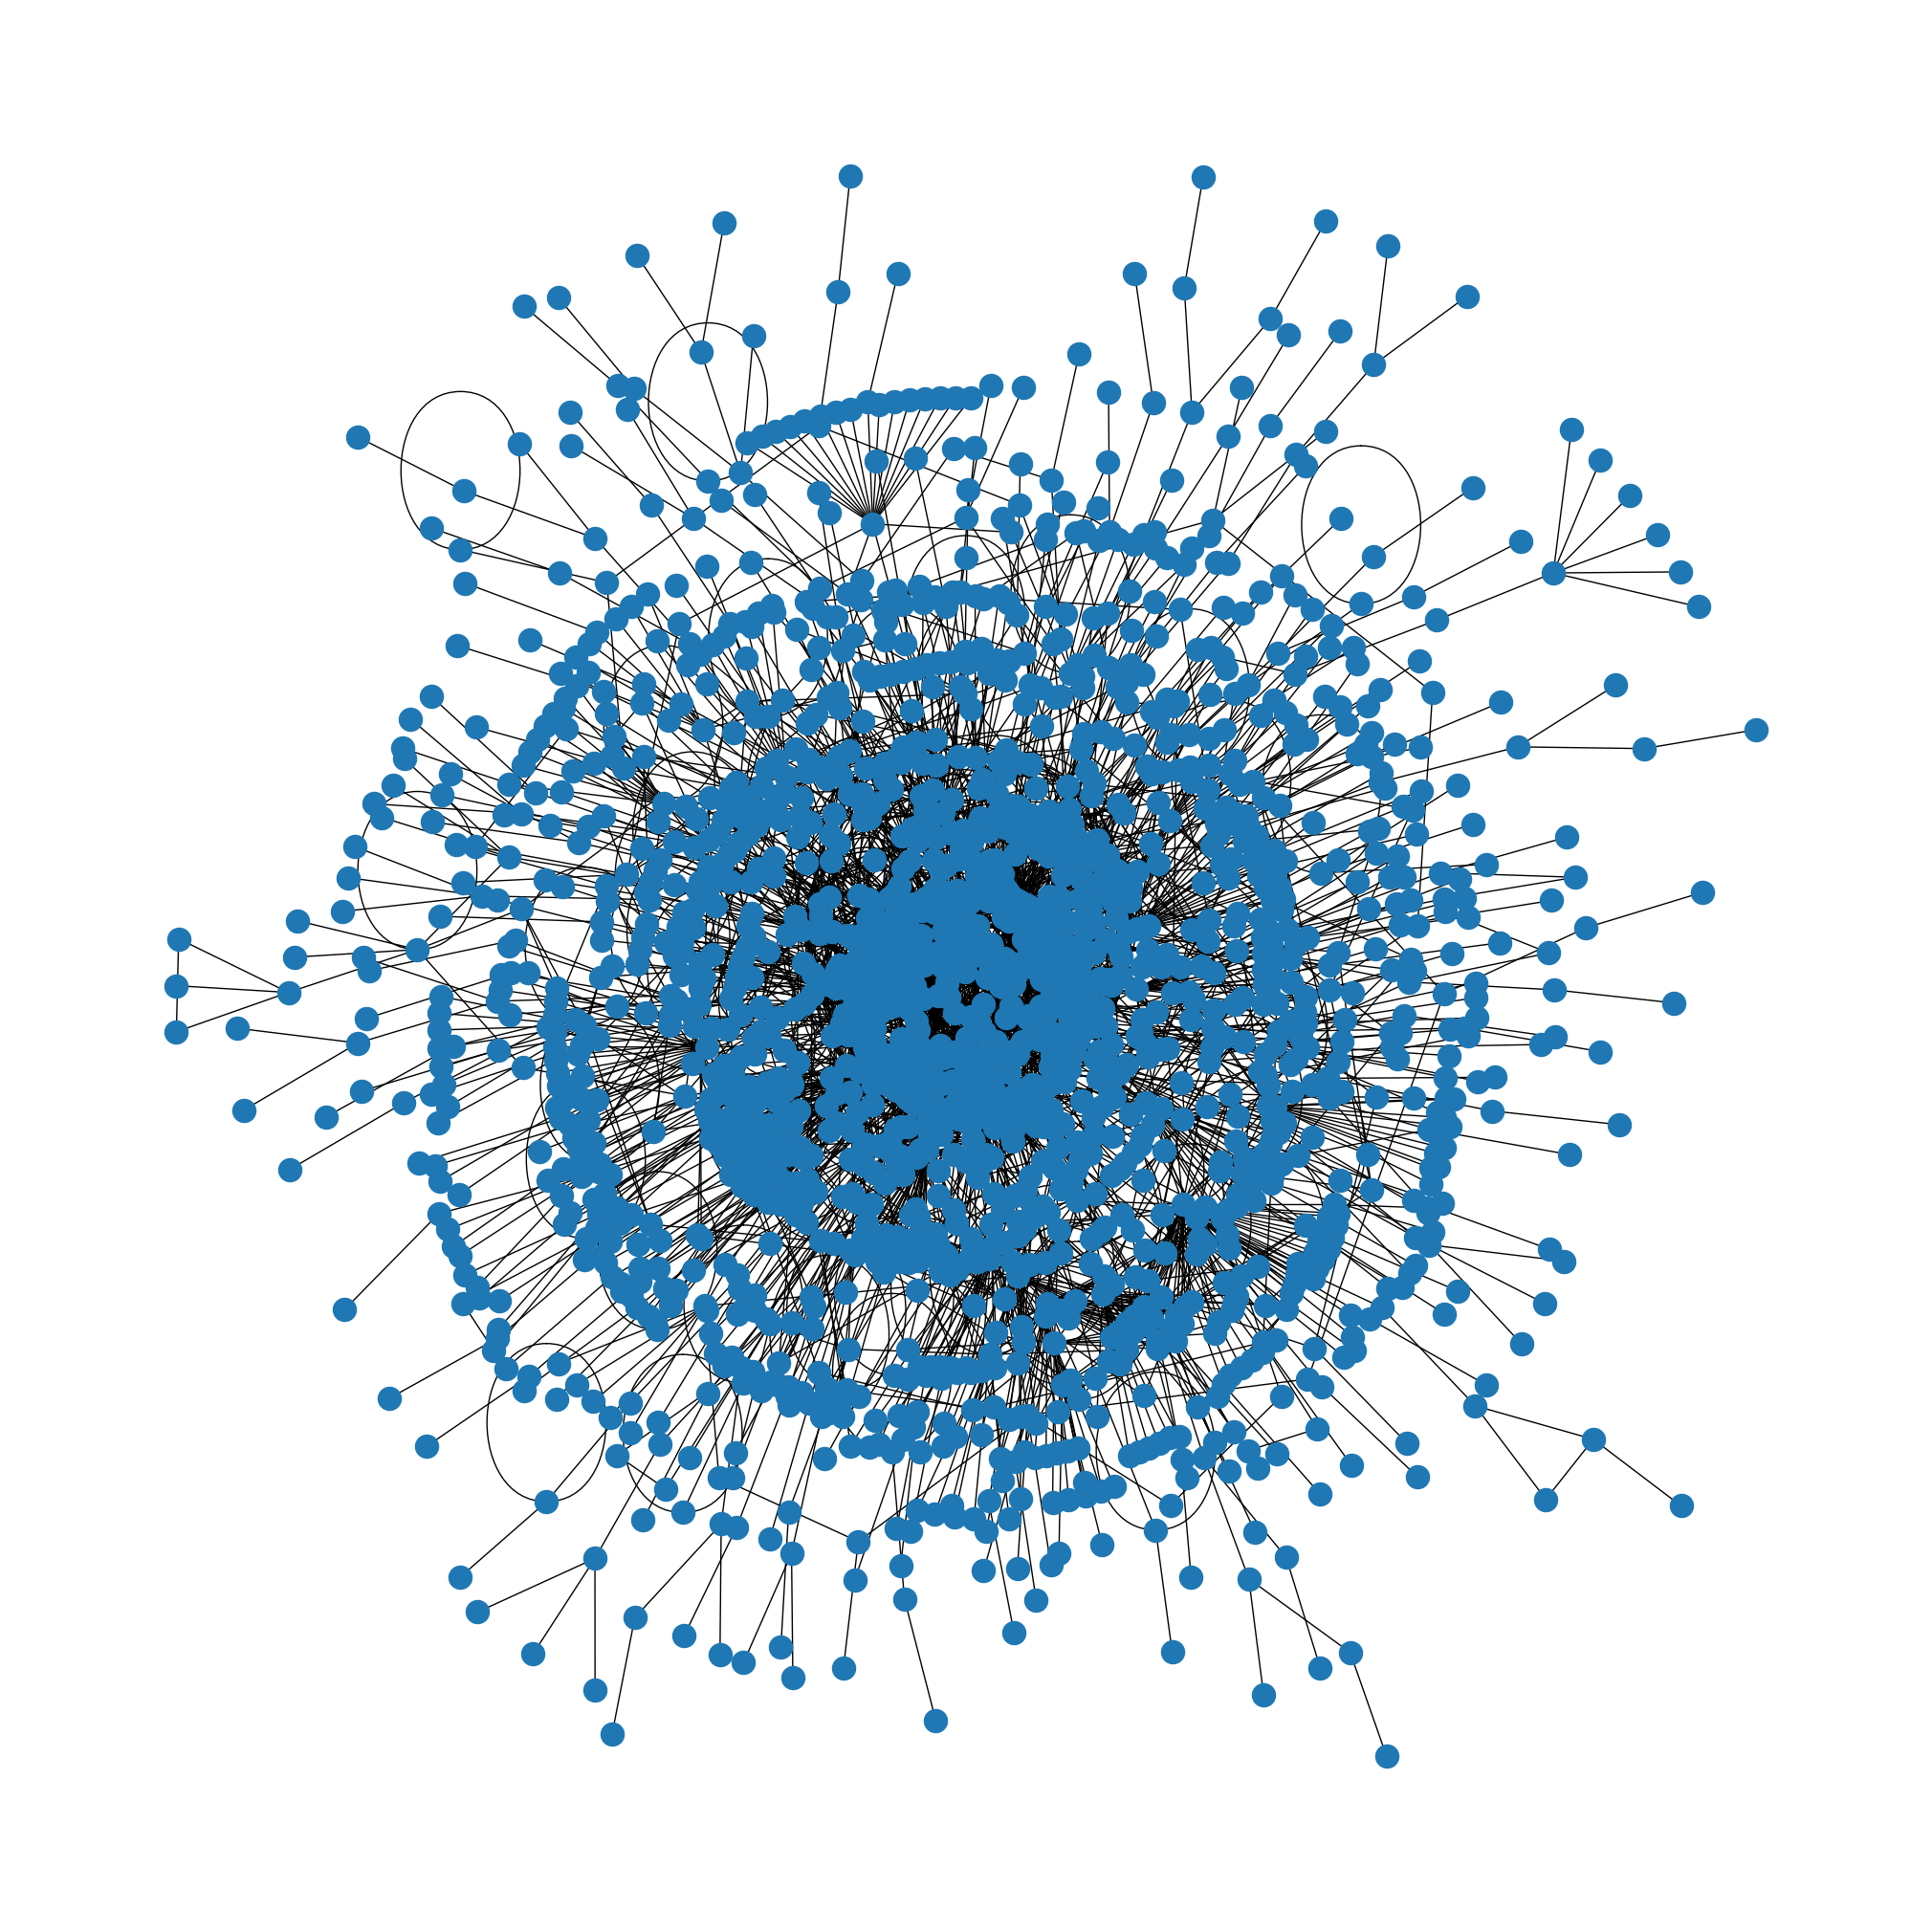

In [4]:

plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(Red_Y2H)

In [6]:
apms = abrir_txt('TC01_data/yeast_AP-MS.txt')
Red_apms = nx.Graph()
Red_apms.add_edges_from(apms) 

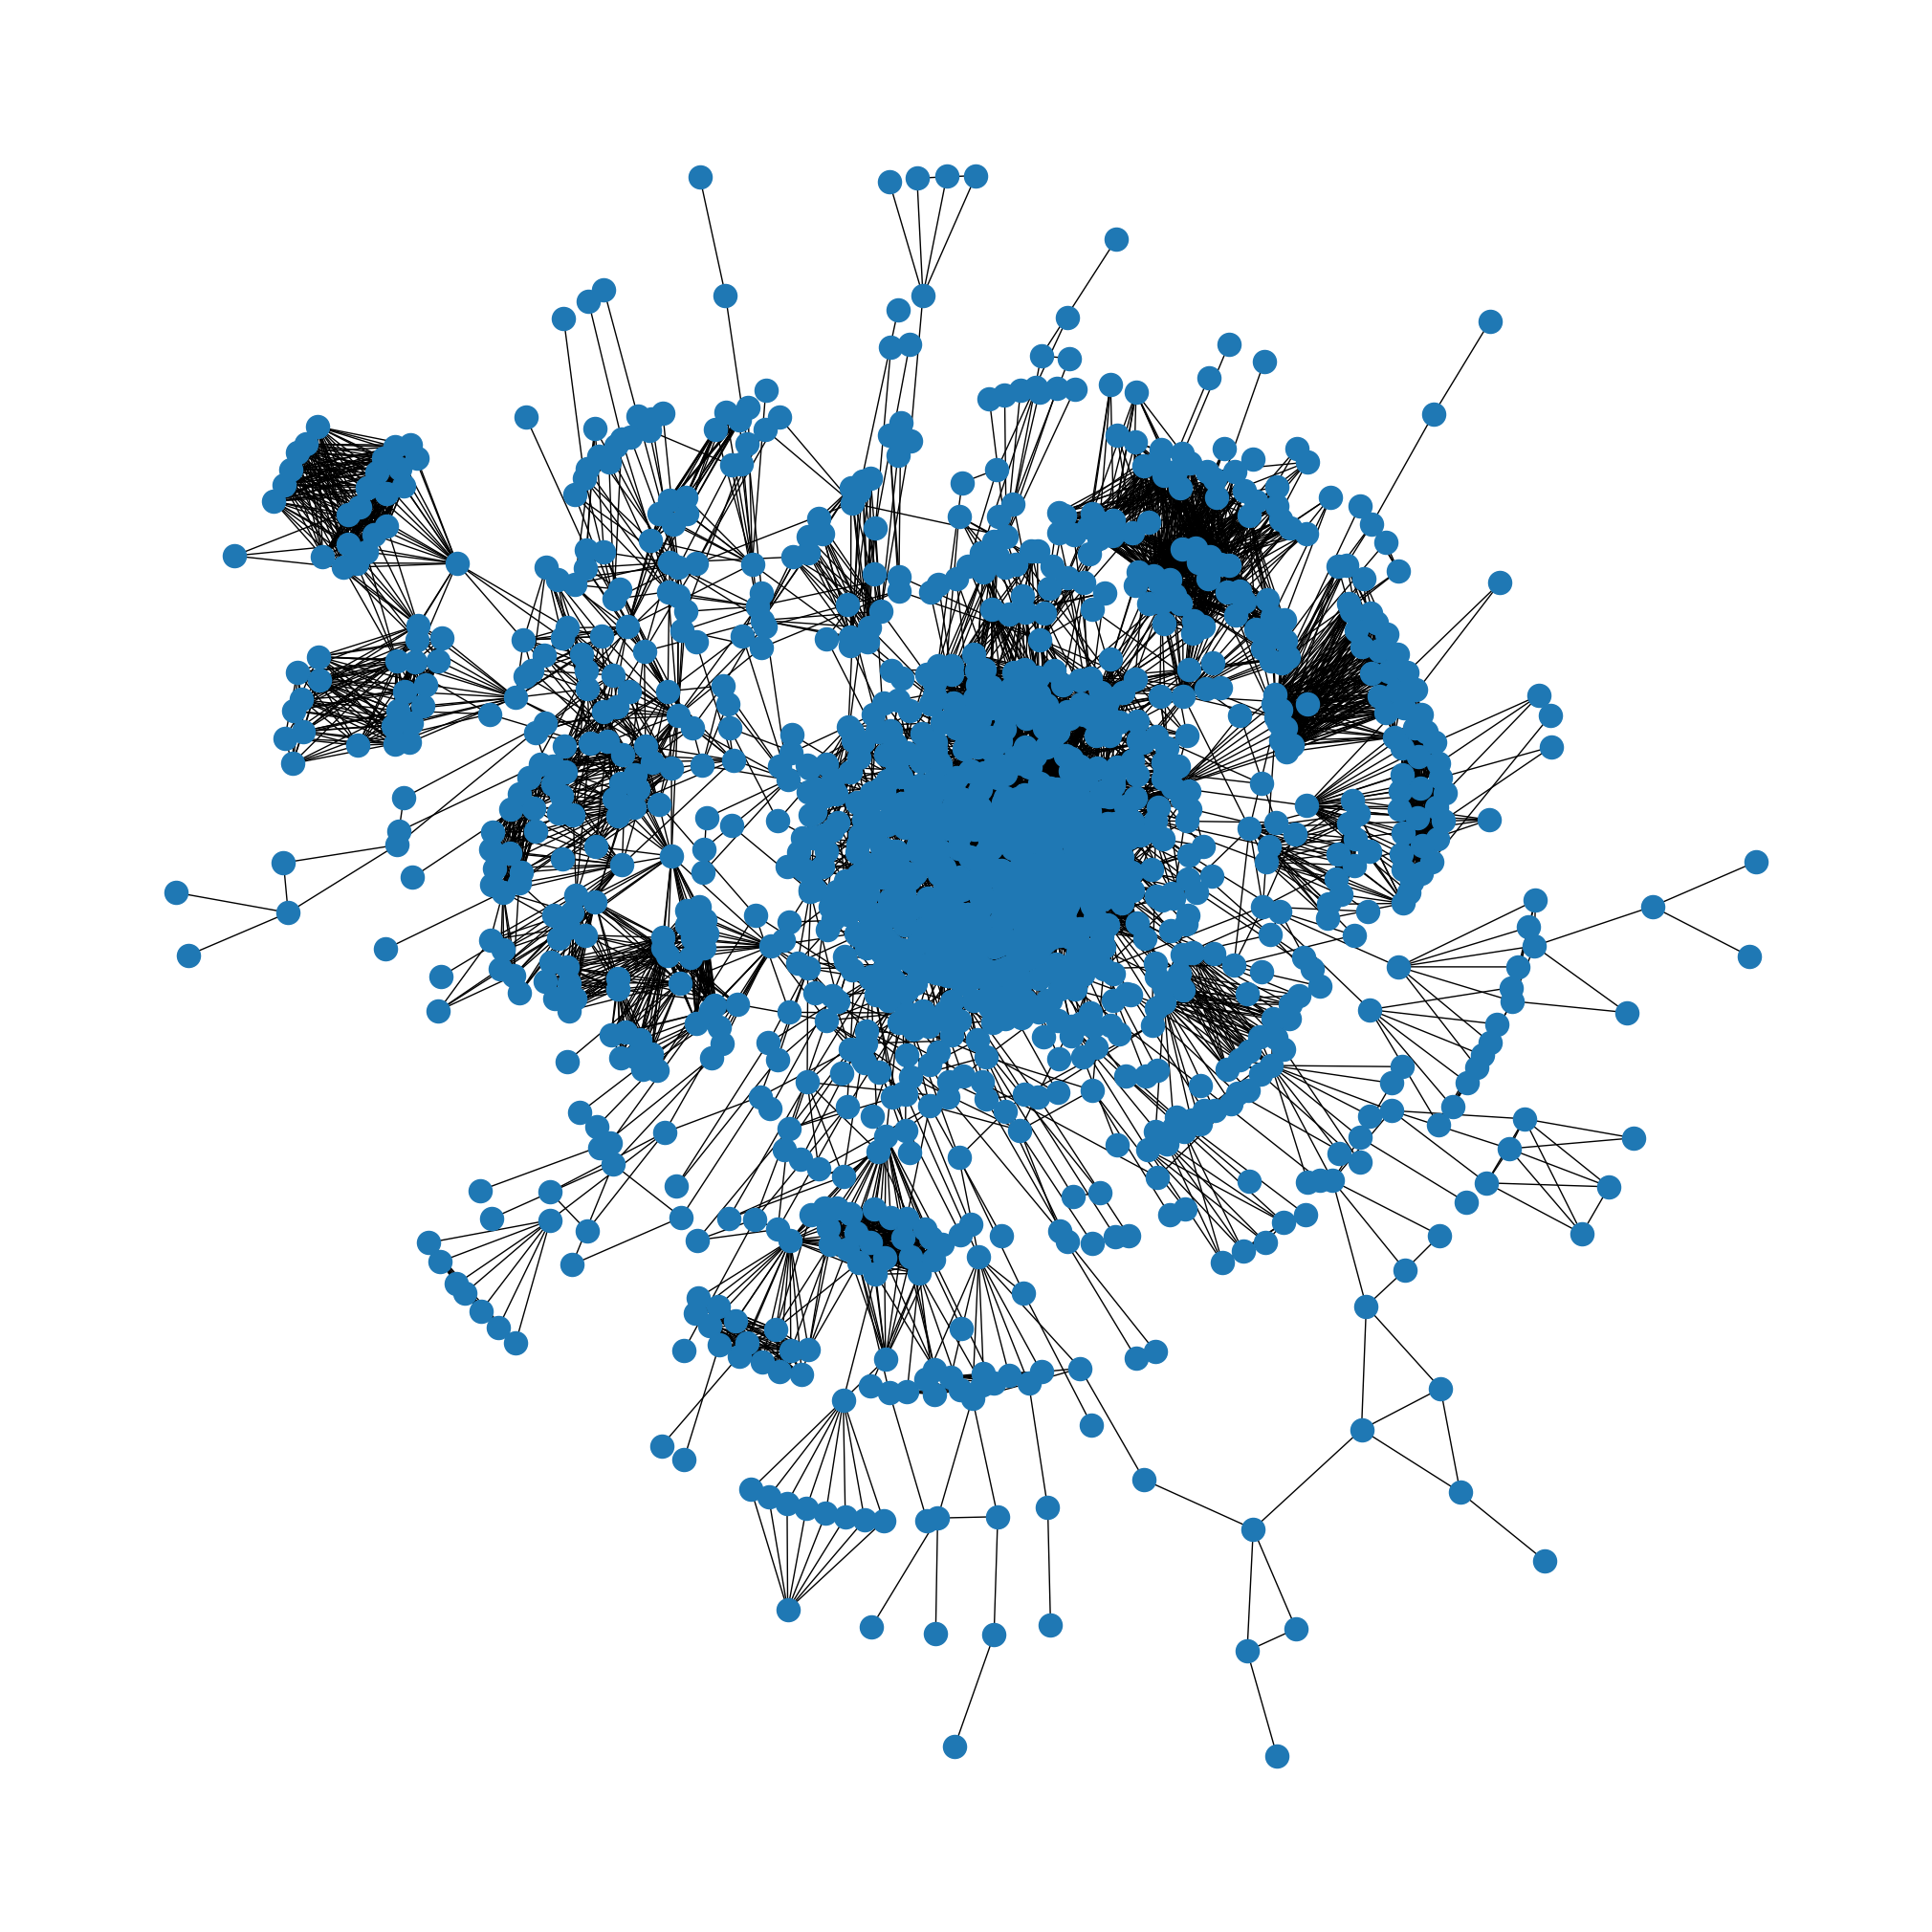

In [5]:
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(Red_apms)

In [7]:
lit = abrir_txt('TC01_data/yeast_LIT.txt')
Red_lit = nx.Graph()
Red_lit.add_edges_from(lit)

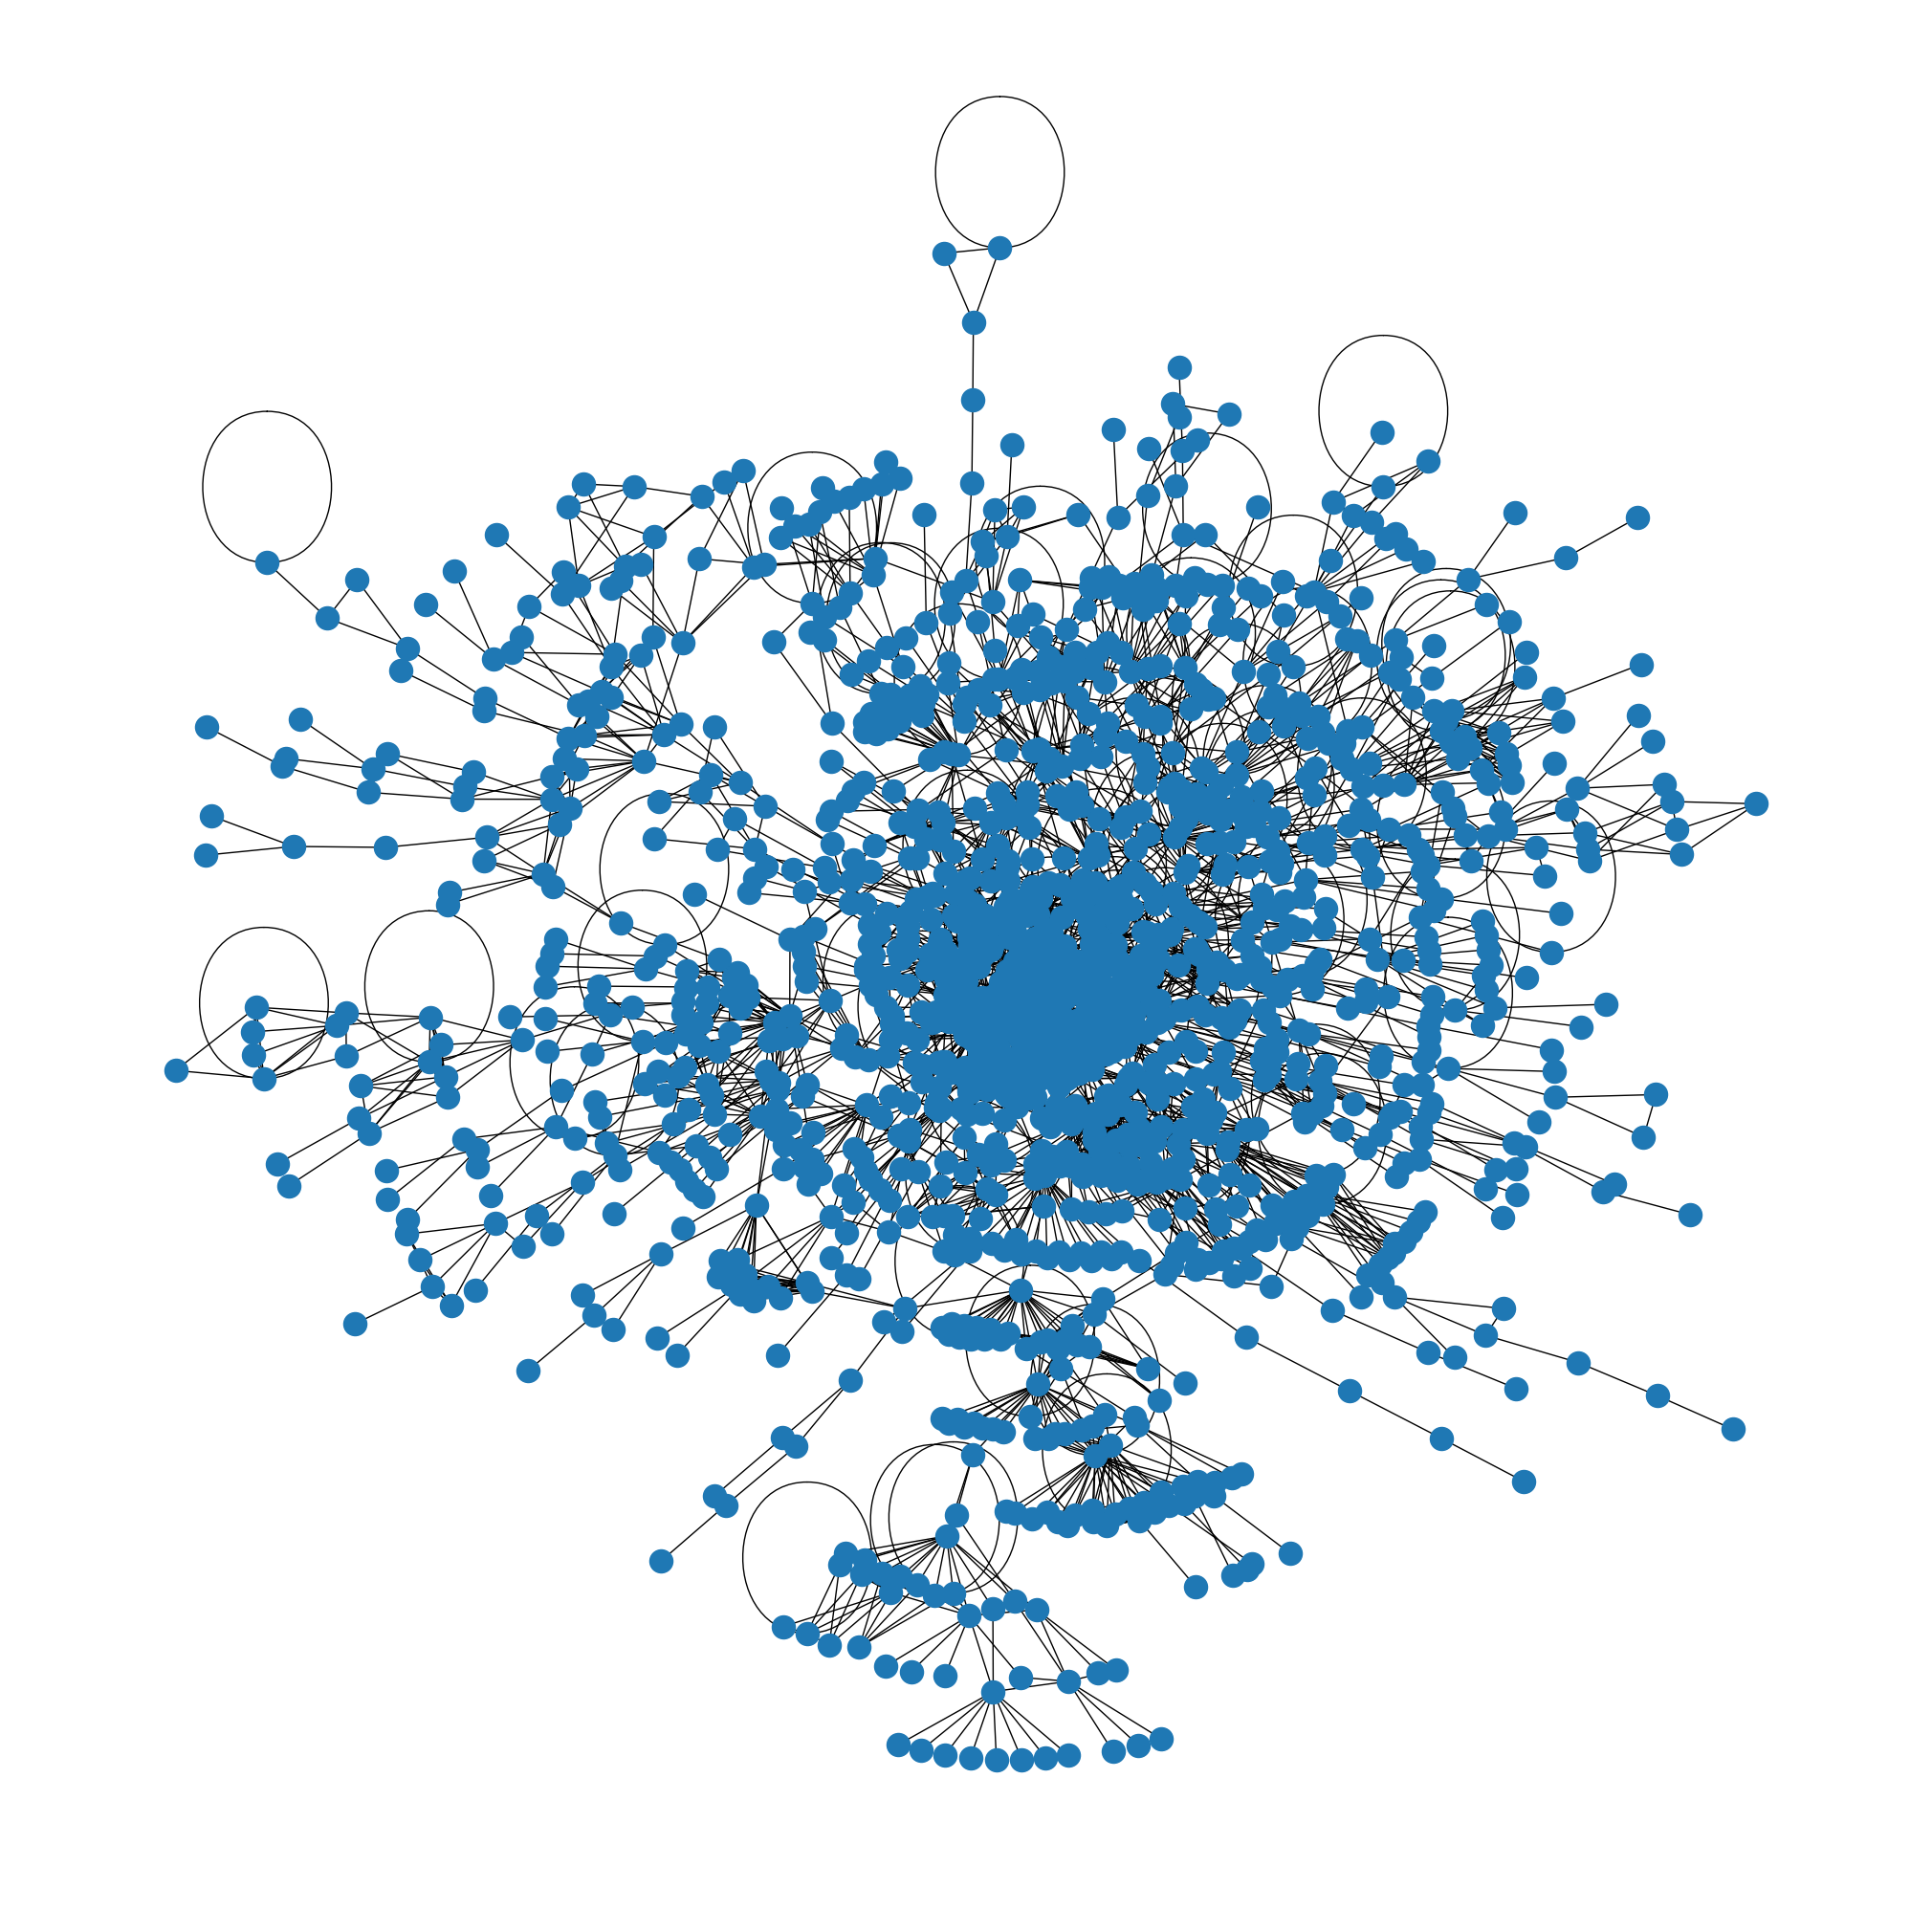

In [6]:
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(Red_lit)

## item b, caracteristicas de la red

In [8]:
diccionario_columna_nodos = {'Metodo': ['Y2H', 'AP-MS', 'LIT'], 'Redes' : [Red_Y2H, Red_apms, Red_lit], '# nodos' : [len(Red_Y2H.nodes()),len(Red_apms.nodes()),len(Red_lit.nodes())]}

tabla_comparativa = pd.DataFrame(data = diccionario_columna_nodos)
tabla_comparativa

Metodo                                              Redes  # nodos
0    Y2H  (MEL1, YJL092W, Q0085, YCR106W, TORF1, TORF19,...     2018
1  AP-MS  (YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, ...     1622
2    LIT  (YDR477W, YGL115W, YER148W, YGR274C, YML051W, ...     1536

In [9]:
redes = [Red_Y2H, Red_apms, Red_lit]

grados_y2h = [val for (node, val) in Red_Y2H.degree()]
grados_apms = [val for (node, val) in Red_apms.degree()]
grados_lit = [val for (node, val) in Red_lit.degree()]

grados = [grados_y2h, grados_apms, grados_lit]


In [12]:
nx.is_connected(Red_Y2H) #No tiene sentido hacer esto porque ya defini al grafo como no dirigido al hacer nx.Graph(), por lo que ya NO es conexo.
# nx.diameter(Red_Y2H)

False

In [13]:
tabla_comparativa['# enlaces'] = [Red_Y2H.number_of_edges(), Red_apms.number_of_edges(), Red_lit.number_of_edges()]
tabla_comparativa['Dirigidada'] = ['No', 'No', 'No']

#Corregir para APMS, LIT con cada in y out, si es que esta bien el criterio de dirigida
tabla_comparativa['<k>'] = [np.mean(grados[i]) for i in range(3)] 


tabla_comparativa['k_max'] = [max(grados[j]) for j in range(3)]
tabla_comparativa['k_min'] = [min(grados[k]) for k in range(3)]



tabla_comparativa['Densidad '] = [nx.density(redes[m]) for m in range(3)]


tabla_comparativa['Clustering coef'] = [nx.average_clustering(redes[n]) for n in range(3)]


tabla_comparativa['Local Clustering coef'] = [nx.transitivity(redes[p]) for p in range(3)]


# tabla_comparativa['Diametro'] = [nx.diameter(redes[n]) for n in range(3)]

tabla_comparativa['Diametro'] = ['No conexas' for q in range(3)]
tabla_comparativa

Metodo                                              Redes  # nodos  \
0    Y2H  (MEL1, YJL092W, Q0085, YCR106W, TORF1, TORF19,...     2018   
1  AP-MS  (YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, ...     1622   
2    LIT  (YDR477W, YGL115W, YER148W, YGR274C, YML051W, ...     1536   

   # enlaces Dirigidada        <k>  k_max  k_min  Densidad   Clustering coef  \
0       2930         No   2.903865     91      1   0.001440         0.046194   
1       9070         No  11.183724    127      1   0.006899         0.554636   
2       2925         No   3.808594     40      1   0.002481         0.292492   

   Local Clustering coef    Diametro  
0               0.023614  No conexas  
1               0.618590  No conexas  
2               0.346193  No conexas

In [14]:
# Son las redes no conexas, tiene sentido ver el diametro?

# # Devuelve conjuntos de nodos, agrupados por componente
# Componentes_LIT = nx.connected_components(Red_lit)
# #print(list(Componentes_LIT))
# # O si solo me interesa la componente gigante
# Componente_Gigante_LIT = max(nx.connected_components(Red_lit), key=len)
# #print(Componente_Gigante_LIT)

# Componentes_Y2H = nx.connected_components(Red_Y2H)
# #print(list(Componentes_Y2H))
# Componente_Gigante_Y2H = max(nx.connected_components(Red_Y2H), key=len)

# Componentes_AP_MS = nx.connected_components(Red_apms)
# # print(list(Componentes_AP_MS))
# Componente_Gigante_AP_MS = max(nx.connected_components(Red_apms), key=len)

In [17]:
# Diametro_LIT = nx.diameter(Red_lit.subgraph(Componente_Gigante_LIT)) #?
# print('El diámetro de LIT es ' + str(Diametro_LIT))

# Diametro_Y2H = nx.diameter(Red_Y2H.subgraph(Componente_Gigante_Y2H)) #?
# print('El diámetro de Y2H es ' + str(Diametro_Y2H))


# Diametro_AP_MS = nx.diameter(Red_apms.subgraph(Componente_Gigante_AP_MS)) #?
# print('El diámetro de AP_MS es ' + str(Diametro_AP_MS))

## Item C

#### Teniendo en cuenta la naturaleza de las interacciones reportadas, diga si es razonable lo que encuentra para el número de enlaces, la densidad y el coeficiente de clustering.

Ver el docs que armaron con la explicacion


- Y2H: sobre la cantidad de enlaces, sobre la densidad 

- AP-MS: sobre la densidad es razonable que "sea grande", en primer lugar porque la cantidad de enlaces es significativamente mayor que en los otros metodos y en segundo lugar 
porque ...

- LIT: 

## Item D - Diagramas de Venn 

Construya, a partir de los 3 datasets, dos diagramas de Venn, uno para nodos y
otro para enlaces, que permitan reconocer la cobertura y coherencia de las
interacciones reportadas.

#### Mucho quilombo era esto:

In [98]:
interseccion_lit_y2h = [np.isin(muestra, lit) for muestra in y2h]
interseccion_lit_apms = [np.isin(muestra, lit) for muestra in apms]
interseccion_y2h_apms = [np.isin(muestra, y2h) for muestra in apms]

In [146]:
interacciones_y2h_lit = [np.isin(muestra, y2h) for muestra in lit]
interacciones_apms_lit = [np.isin(muestra, apms) for muestra in lit]
interacciones_apms_y2h = [np.isin(muestra, apms) for muestra in y2h]

In [110]:
litInY2h = []
for o in interseccion_lit_y2h:
    if o[0] and o[1]:
        litInY2h.append(1)
    else:
        litInY2h.append(0)

litInApms = []
for o in interseccion_lit_apms:
    if o[0] and o[1]:
        litInApms.append(2)
    else:
        litInApms.append(0)

y2hInApms = []
for o in interseccion_y2h_apms:
    if o[0] and o[1]:
        y2hInApms.append(2)
    else:
        y2hInApms.append(1)

In [147]:
y2hInLit = []
for o in interacciones_y2h_lit:
    if o[0] and o[1]:
        y2hInLit.append(1)
    else:
        y2hInLit.append(0)
        
apmsInLit = []
for o in interacciones_apms_lit:
    if o[0] and o[1]:
        apmsInLit.append(1)
    else:
        apmsInLit.append(0)

apmsInY2H = []
for o in interacciones_apms_y2h:
    if o[0] and o[1]:
        apmsInY2H.append(1)
    else:
        apmsInY2H.append(0)

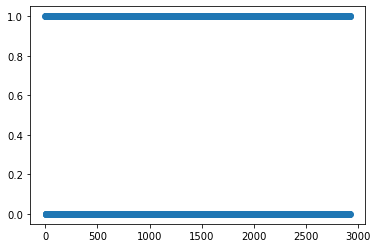

In [150]:
plt.plot(apmsInLit, 'o')

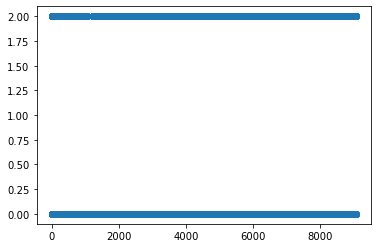

In [114]:
plt.plot(litInApms, 'o')

In [120]:
y2hInApms.count(2)

1418

Text(0.5, 1.0, 'Enlaces en común')

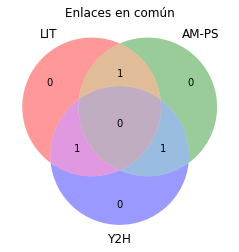

In [115]:
set1 = set(litInY2h)
set2 = set(litInApms)
set3 = set(y2hInApms)

plt.figure()
venn3([set1, set2, set3], ('LIT', 'AM-PS', 'Y2H'))
plt.title('Enlaces en común')

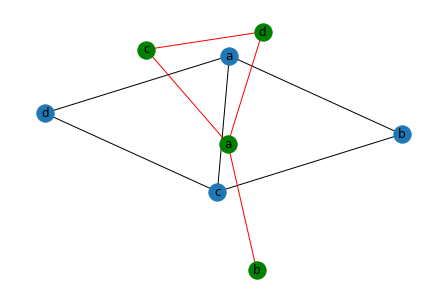

In [173]:
red_prueba = nx.Graph()
red_prueba.add_edges_from([['a','b'], ['b','c'], ['c','d'], ['a','c'], ['a', 'd']])

red_prueba2 = nx.Graph()
red_prueba2.add_edges_from([['a','b'], ['a','c'], ['a','d'], ['c', 'd']])

nx.draw(red_prueba, with_labels=True)
nx.draw(red_prueba2, with_labels=True, edge_color='red', node_color='green')

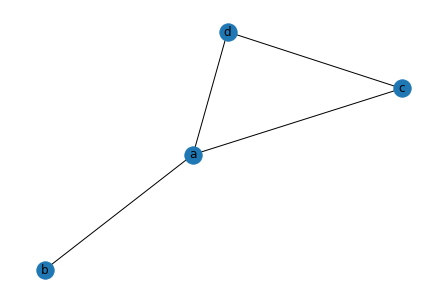

In [174]:
# Create an empty graph
graph_links = nx.Graph()

# Iterate over the edges of red_prueba
for edge in red_prueba.edges():
    # Check if the edge is present in red_prueba2
    if edge in red_prueba2.edges():
        # Add the edge to the graph_links
        graph_links.add_edge(edge[0], edge[1])

# Draw the graph
nx.draw(graph_links, with_labels=True)

In [175]:
graph_links.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('a', 'd'), ('c', 'd')])

In [183]:
graph_links = nx.Graph()

for edge in Red_lit.edges():
    if edge in Red_apms.edges():
        graph_links.add_edge(edge[0], edge[1])

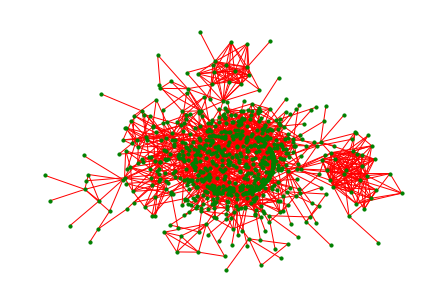

In [181]:
nx.draw_kamada_kawai(graph_links, edge_color='red', node_color='green', node_size=10)

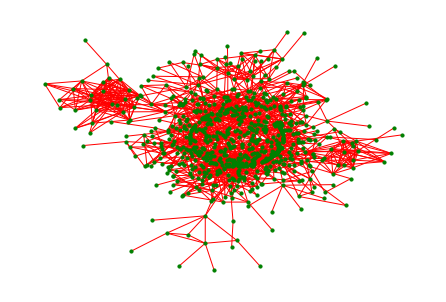

In [186]:
graph_links2 = nx.Graph()

for edge in Red_apms.edges():
    if edge in Red_lit.edges():
        graph_links2.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links2, edge_color='red', node_color='green', node_size=10)

In [188]:
graph_links.number_of_edges(), graph_links2.number_of_edges(), graph_links.number_of_nodes(), graph_links2.number_of_nodes()

(1298, 1298, 781, 781)

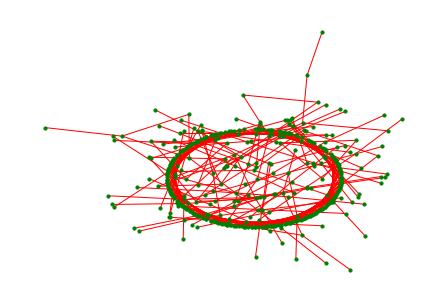

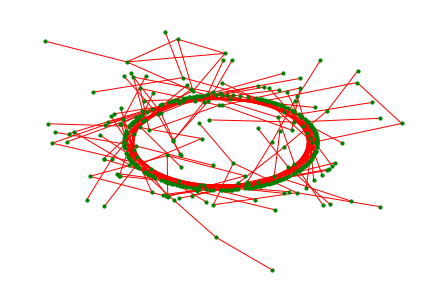

In [191]:
graph_links3 = nx.Graph()

for edge in Red_Y2H.edges():
    if edge in Red_apms.edges():
        graph_links3.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links3, edge_color='red', node_color='green', node_size=10)

plt.figure()
graph_links4 = nx.Graph()

for edge in Red_apms.edges():
    if edge in Red_Y2H.edges():
        graph_links4.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links4, edge_color='red', node_color='green', node_size=10)

In [192]:
graph_links3.number_of_edges(), graph_links4.number_of_edges(), graph_links3.number_of_nodes(), graph_links4.number_of_nodes()

(260, 230, 410, 365)

(260, 174, 380, 279)

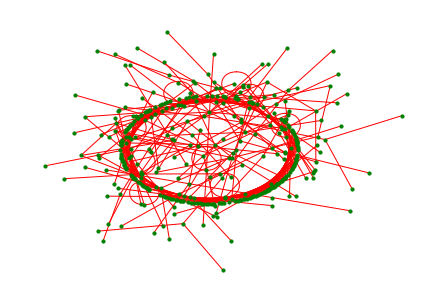

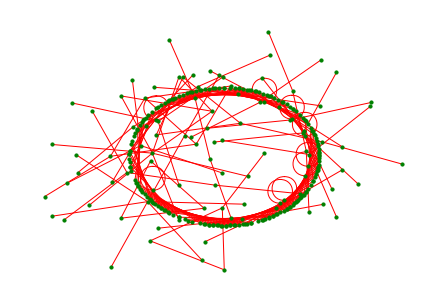

In [196]:
graph_links5 = nx.Graph()

for edge in Red_Y2H.edges():
    if edge in Red_lit.edges():
        graph_links5.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links5, edge_color='red', node_color='green', node_size=10)

plt.figure()
graph_links6 = nx.Graph()

for edge in Red_lit.edges():
    if edge in Red_Y2H.edges():
        graph_links6.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links6, edge_color='red', node_color='green', node_size=10)

graph_links5.number_of_edges(), graph_links6.number_of_edges(), graph_links5.number_of_nodes(), graph_links6.number_of_nodes()

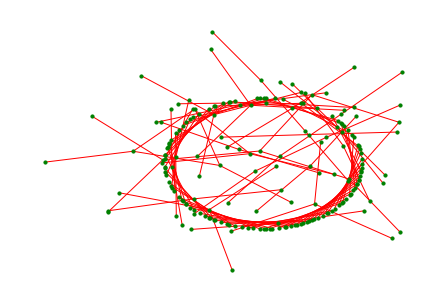

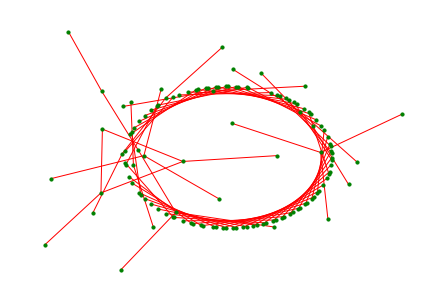

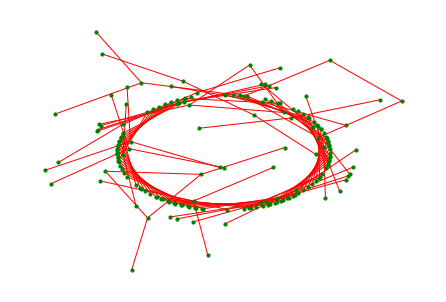

In [201]:
graph_links7 = nx.Graph()

for edge in Red_Y2H.edges(): 
    if edge in Red_lit.edges() and edge in Red_apms.edges(): 
        graph_links7.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links7, edge_color='red', node_color='green', node_size=10)

plt.figure()
graph_links8 = nx.Graph()

for edge in Red_lit.edges():
    if edge in Red_Y2H.edges() and edge in Red_apms.edges():
        graph_links8.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links8, edge_color='red', node_color='green', node_size=10)

plt.figure()
graph_links9 = nx.Graph()

for edge in Red_apms.edges():
    if edge in Red_Y2H.edges() and edge in Red_lit.edges():
        graph_links9.add_edge(edge[0], edge[1])

nx.draw_kamada_kawai(graph_links9, edge_color='red', node_color='green', node_size=10)

In [202]:
graph_links7.number_of_edges(), graph_links7.number_of_nodes(), graph_links8.number_of_edges(), graph_links8.number_of_nodes(), graph_links9.number_of_edges(), graph_links9.number_of_nodes()

(120, 196, 73, 127, 110, 181)

In [209]:
cantidadNodos_lit_apms = graph_links.number_of_nodes()
cantidadEnlaces_lit_apms = graph_links.number_of_edges()

cantidadNodos_y2h_apms = min(graph_links4.number_of_nodes(), graph_links3.number_of_nodes())
cantidadEnlaces_y2h_apms = min(graph_links4.number_of_edges(), graph_links3.number_of_edges())

cantidadNodos_y2h_lit = min(graph_links5.number_of_nodes(), graph_links6.number_of_nodes())
cantidadEnlaces_y2h_lit = min(graph_links5.number_of_edges(), graph_links6.number_of_edges())

cantidadNodos_todos = min(graph_links7.number_of_nodes(), graph_links8.number_of_nodes(), graph_links9.number_of_nodes())
cantidadEnlaces_todos = min(graph_links7.number_of_edges(), graph_links8.number_of_edges(), graph_links9.number_of_edges())

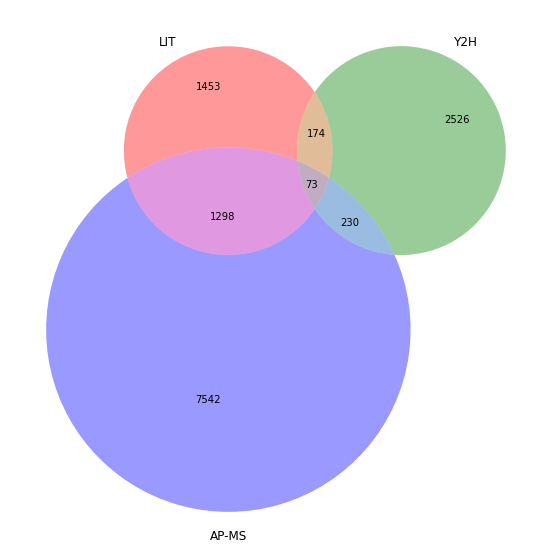

In [210]:
soloLit = Red_lit.number_of_edges() - cantidadEnlaces_lit_apms - cantidadEnlaces_y2h_lit
soloApms = Red_apms.number_of_edges() - cantidadEnlaces_lit_apms - cantidadEnlaces_y2h_apms
soloY2h = Red_Y2H.number_of_edges() - cantidadEnlaces_y2h_apms - cantidadEnlaces_y2h_lit

plt.figure(figsize = (10,10))
venn3(subsets = (soloLit, soloY2h, cantidadEnlaces_y2h_lit, soloApms, cantidadEnlaces_lit_apms, cantidadEnlaces_y2h_apms, cantidadEnlaces_todos), set_labels = ('LIT', 'Y2H', 'AP-MS'))

In [212]:
7542+1298+73+230, 1453+174+73+1298, 2526+174+73+230

(9143, 2998, 3003)

#### Solucion rapida: 
Ojo, tiene el mismo problema que el mio, sobre cuenta de alguna forma

Text(0.5, 1.0, 'Diagrama de Venn de enlaces')

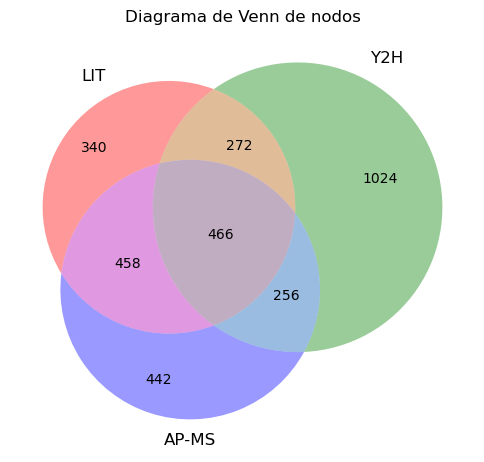

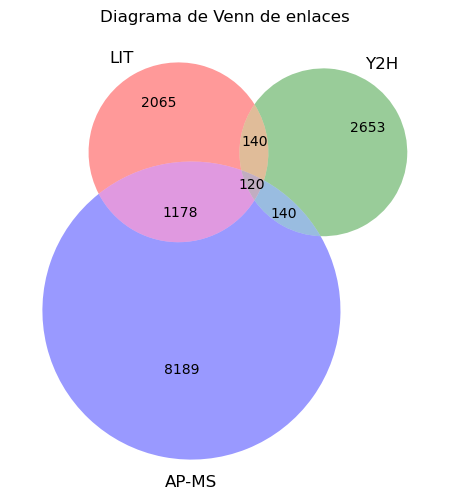

In [25]:
plt.figure(figsize = (6,6))
venn3([Red_lit.nodes, Red_Y2H.nodes, Red_apms.nodes], ('LIT', 'Y2H', 'AP-MS'))
plt.title('Diagrama de Venn de nodos')

plt.figure(figsize = (6,6))
venn3([Red_lit.edges, Red_Y2H.edges, Red_apms.edges], ('LIT', 'Y2H', 'AP-MS'))
plt.title('Diagrama de Venn de enlaces')

# Problema 2

In [2]:
Red_delfines = nx.read_gml('TC01_data/dolphins.gml')

### a. Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. 
Justifique su elección detallando las características
estructurales de la red que su elección pone en evidencia. Incluya en la
representación gráfica de la red información sobre el sexo de los delfines.

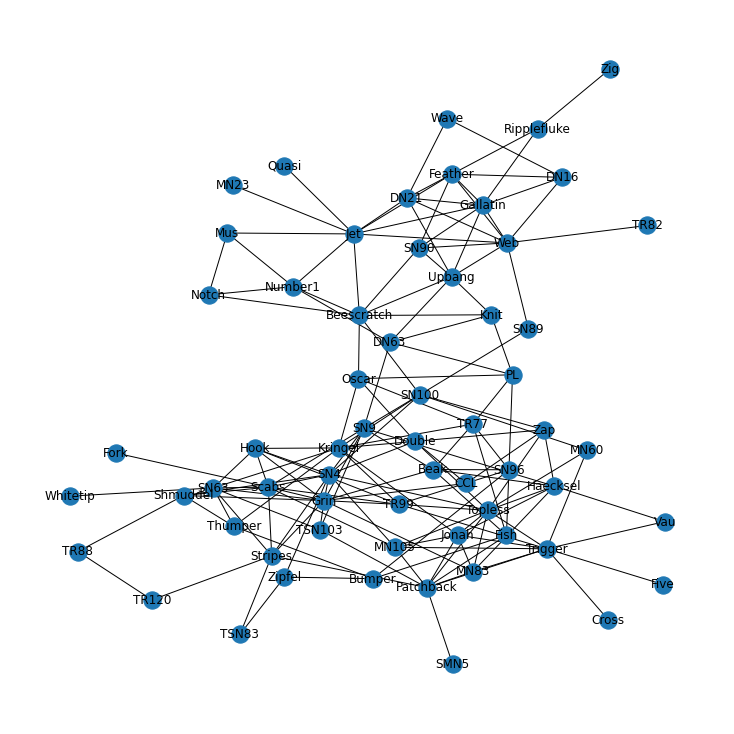

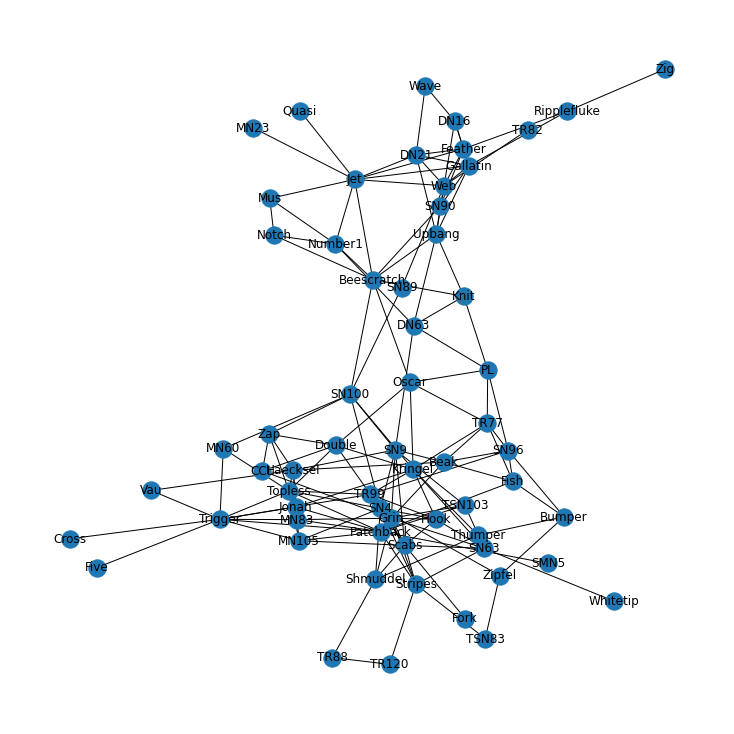

In [249]:
plt.figure(figsize = (10,10))
nx.draw_kamada_kawai(Red_delfines, with_labels=True)
plt.figure(figsize = (10,10))
nx.draw(Red_delfines, with_labels=True, pos = nx.spring_layout(Red_delfines))

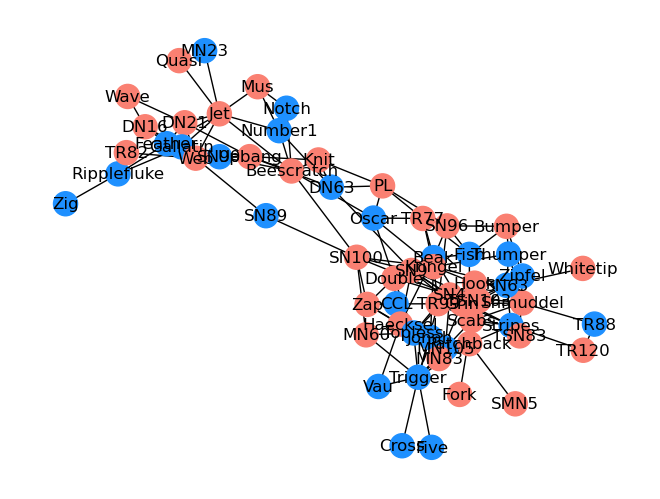

In [33]:
# degrees = [Red_delfines.degree(node) for node in Red_delfines.nodes()]

# Defino el color basado en el grado (encontré por ahí que se relacionan en grupos de 3 o mas machos con hembras)
# node_colors = ['salmon' if degree >= 3 else 'dodgerblue' for degree in degrees]

node_colors_original = [np.random.randint(0, 2) for _ in range(len(Red_delfines.nodes()))]
node_colors_original_2 = ['salmon' if color == 0 else 'dodgerblue' for color in node_colors_original]

nx.draw_spring(Red_delfines, with_labels=True, node_color = node_colors_original_2)

### Item b

In [34]:
for node, color in zip(Red_delfines.nodes(), node_colors_original):
    Red_delfines.add_node(node, genero=color)

In [35]:
Red_delfines.nodes(data=True)

NodeDataView({'Beak': {'genero': 1}, 'Beescratch': {'genero': 0}, 'Bumper': {'genero': 0}, 'CCL': {'genero': 1}, 'Cross': {'genero': 1}, 'DN16': {'genero': 0}, 'DN21': {'genero': 0}, 'DN63': {'genero': 1}, 'Double': {'genero': 0}, 'Feather': {'genero': 1}, 'Fish': {'genero': 1}, 'Five': {'genero': 1}, 'Fork': {'genero': 0}, 'Gallatin': {'genero': 1}, 'Grin': {'genero': 0}, 'Haecksel': {'genero': 0}, 'Hook': {'genero': 0}, 'Jet': {'genero': 0}, 'Jonah': {'genero': 1}, 'Knit': {'genero': 0}, 'Kringel': {'genero': 0}, 'MN105': {'genero': 1}, 'MN23': {'genero': 1}, 'MN60': {'genero': 0}, 'MN83': {'genero': 0}, 'Mus': {'genero': 0}, 'Notch': {'genero': 1}, 'Number1': {'genero': 1}, 'Oscar': {'genero': 1}, 'Patchback': {'genero': 0}, 'PL': {'genero': 0}, 'Quasi': {'genero': 0}, 'Ripplefluke': {'genero': 1}, 'Scabs': {'genero': 0}, 'Shmuddel': {'genero': 0}, 'SMN5': {'genero': 0}, 'SN100': {'genero': 0}, 'SN4': {'genero': 0}, 'SN63': {'genero': 1}, 'SN89': {'genero': 1}, 'SN9': {'genero': 0},

In [36]:
i = 0
for nodo in Red_delfines.nodes():
    if Red_delfines.nodes[nodo]['genero'] == 0:
        i = i + 1
    
relacion_M_original = i/len(Red_delfines.nodes())
relacion_F_original = 1 - relacion_M_original
relacion_M_original, relacion_F_original

(0.5806451612903226, 0.4193548387096774)

In [86]:
relacion_M_azar = []
relacion_F_azar = []
Red_delfines_azar = Red_delfines.copy() 
for k in range(50000):
    node_colors = [np.random.randint(0, 2) for _ in range(len(Red_delfines.nodes()))]

    # nx.draw_spring(Red_delfines, with_labels=True, node_color = node_colors)

    for node, color in zip(Red_delfines_azar.nodes(), node_colors):
        Red_delfines_azar.add_node(node, genero=color)

    j = 0
    for nodo in Red_delfines_azar.nodes():
        if Red_delfines_azar.nodes[nodo]['genero'] == 0:
            j = j + 1
        
    relacion_M = j/len(Red_delfines.nodes())
    relacion_F = 1 - relacion_M
    relacion_M_azar.append(relacion_M)
    relacion_F_azar.append(relacion_F)

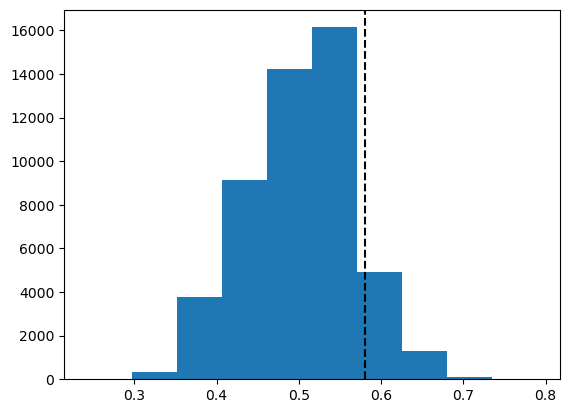

In [87]:
a = plt.hist(relacion_M_azar, bins = 10)
plt.axvline(relacion_M_original, ls = '--', color = 'k')

In [88]:
np.sum(a[0]/len(relacion_M_azar))

0.9999999999999999

In [89]:
np.sum((a[0]/len(relacion_M_azar))[-4:])

0.1266

In [90]:
mean = np.mean(relacion_M_azar)
std = np.std(relacion_M_azar)

# Calcular el p-value
p_value = 1 - norm.cdf(relacion_M_original, loc=mean, scale=std)

print(f"El p-value de {relacion_M_original} es {p_value}")

El p-value de 0.5806451612903226 es 0.10211851928581539


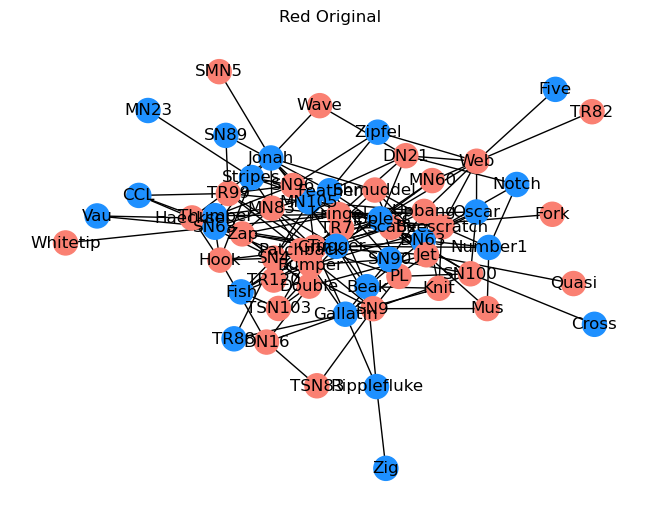

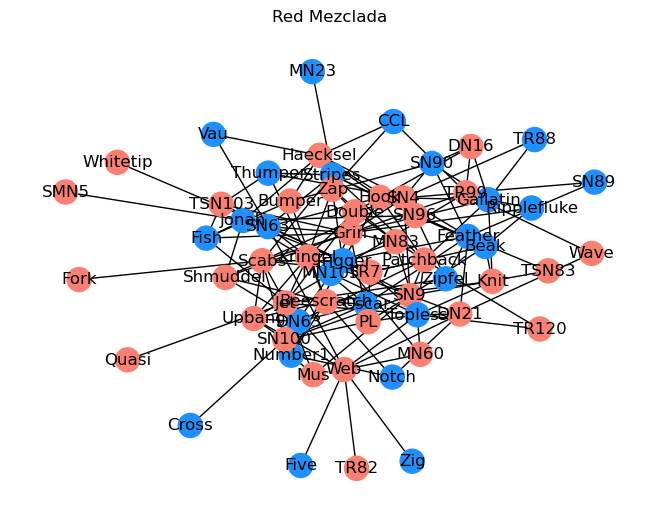

In [99]:
plt.figure()
nx.draw_spring(Red_delfines, with_labels=True, node_color = node_colors_original_2)
plt.title('Red Original')

# Reconecto el 10% de enlaces
pares_de_enlaces_a_cambiar = int(0.1*Red_delfines.number_of_edges())

plt.figure()
Red_delfines_enlaces_random = nx.double_edge_swap(Red_delfines, nswap = pares_de_enlaces_a_cambiar, max_tries=100)
nx.draw_spring(Red_delfines_enlaces_random, with_labels = True, node_color = node_colors_original_2) #Notar que la red original es mezclada
plt.title('Red Mezclada');

In [100]:
Red_delfines_enlaces_random